# EDA French hospital data about Covid 19

# Library

In [1]:
install.packages("dplyr")
library(dplyr)


  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.6  1.0.7              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\baege\AppData\Local\Temp\RtmpqyKCdG\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
install.packages("ggplot2")
library(ggplot2)


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



## Import data

In [ ]:
#==============================================================#
# ================== Scapping from internet ===================#

In [ ]:
#==============================================================#

In [3]:
df_incid_reg <- read.csv("data/data_hopital/covid-hospit-incid-reg-2022-01-09-19h06.csv", sep=";")
#### Changement du nom des colonnes
# names(data) <- c("X", "année", "prénom", "genre", "naissance")
# Affichage des 5 premières lignes
head(df_incid_reg,5)

jour,nomReg,numReg,incid_rea
2020-03-19,Guadeloupe,1,0
2020-03-20,Guadeloupe,1,0
2020-03-21,Guadeloupe,1,0
2020-03-22,Guadeloupe,1,5
2020-03-23,Guadeloupe,1,0


In [4]:
# df_incid_reg <- read.csv("data/data_hopital/covid-hospit-incid-reg-2022-01-09-19h06.csv", sep=";")
# #### Changement du nom des colonnes
# # names(data) <- c("X", "année", "prénom", "genre", "naissance")
# # Affichage des 5 premières lignes
# head(df_incid_reg,5)

In [5]:
df_hebdo_covid <- read.csv("data/data_hopital/donnees-hospitalieres-covid19-2022-01-09-19h06.csv", sep=";")
#### Changement du nom des colonnes
# names(data) <- c("X", "année", "prénom", "genre", "naissance")
# Affichage des 5 premières lignes
head(df_hebdo_covid,15)

dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
01,0,2020-03-18,2,0,NA,NA,NA,1,0
01,1,2020-03-18,1,0,NA,NA,NA,1,0
01,2,2020-03-18,1,0,NA,NA,NA,0,0
02,0,2020-03-18,41,10,NA,NA,NA,18,11
02,1,2020-03-18,19,4,NA,NA,NA,11,6
02,2,2020-03-18,22,6,NA,NA,NA,7,5
03,0,2020-03-18,4,0,NA,NA,NA,1,0
03,1,2020-03-18,1,0,NA,NA,NA,0,0
03,2,2020-03-18,3,0,NA,NA,NA,1,0
04,0,2020-03-18,3,1,NA,NA,NA,2,0


-------------------------------------

## Exploration

#### dep

In [6]:
deps <- df_hebdo_covid %>% count(dep)
head(deps,3)

dep,n
01,1989
02,1989
03,1989


In [7]:
nb_dep <- length(deps$dep)
nb_dep

[1] 102

In [8]:
deps$dep

[1] 01  02  03  04  05  06  07  08  09  10  11  12  13  14  15  16  17  18 
 [19] 19  21  22  23  24  25  26  27  28  29  2A  2B  30  31  32  33  34  35 
 [37] 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53 
 [55] 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71 
 [73] 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89 
 [91] 90  91  92  93  94  95  971 972 973 974 976 978
102 Levels: 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 21 ... 978

In [9]:
# On a bien tous les départements de la France (+Outre mers + dep 978)

#### sexe

In [10]:
sexes <- df_hebdo_covid %>% count(sexe)
head(sexes,5)

sexe,n
0,67626
1,67626
2,66963


In [11]:
sexes$percent <- (sexes$n*100)/sum(sexes$n)
sexes

sexe,n,percent
0,67626,33.44262
1,67626,33.44262
2,66963,33.11475


#### jour

In [12]:
jours <- df_hebdo_covid %>% count(jour)
head(jours,3)

jour,n
2020-03-18,305
2020-03-19,305
2020-03-20,305


In [13]:
length(jours$jour)

[1] 663

In [14]:
lst_date <- max(as.Date(jours$jour))
lst_date

[1] "2022-01-09"

In [15]:
fst_date <- min(as.Date(jours$jour))
fst_date

[1] "2020-03-18"

In [16]:
# Les observations sont donc entre le début du premier confinement et le 9 janvier 2022

#### hosp

In [17]:
hosps <- df_hebdo_covid %>% count(hosp)
head(hosps,4)

hosp,n
0,4983
1,4157
2,3932
3,3527


In [18]:
more_nb_hosp <- hosps %>% filter(hosps$hosp == max(hosps$hosp))
more_nb_hosp

hosp,n
3281,1


In [19]:
more_freq_nb_hosp <- hosps %>% filter(hosps$n == max(hosps$n))
more_freq_nb_hosp

hosp,n
0,4983


#### rea

In [20]:
reas <- df_hebdo_covid %>% count(rea)
head(reas,4)

rea,n
0,29349
1,21422
2,16662
3,13373


In [21]:
more_nb_rea <- reas %>% filter(reas$rea == max(reas$rea))
more_nb_rea

rea,n
855,1


In [22]:
more_freq_rea <- reas %>% filter(reas$n == max(reas$n))
more_freq_rea

rea,n
0,29349


#### HospConv

In [23]:
HospConvs <- df_hebdo_covid %>% count(HospConv)
head(HospConvs,6)

HospConv,n
0,2136
1,2112
2,2294
3,2796
4,2812
5,2637


In [24]:
HospConvs %>% filter(HospConvs$HospConv == max(HospConvs$HospConv,na.rm = TRUE))

HospConv,n
1006,1


In [25]:
HospConvs %>% filter(HospConvs$n == max(filter(HospConvs,!is.na(HospConvs$HospConv)),na.rm = TRUE))

HospConv,n
4,2812


In [26]:
HospConvs %>% filter(HospConvs$n == max(HospConvs$n,na.rm = TRUE))

HospConv,n
NA,110105


#### SSR_USLD

In [27]:
SSR_USLDs <- df_hebdo_covid %>% count(SSR_USLD)
head(SSR_USLDs,6)

SSR_USLD,n
0,6738
1,5872
2,4624
3,3883
4,3979
5,3165


In [28]:
SSR_USLDs %>% filter(SSR_USLDs$SSR_USLD == max(SSR_USLDs$SSR_USLD,na.rm = TRUE))

SSR_USLD,n
524,1


In [29]:
SSR_USLDs %>% filter(SSR_USLDs$n == max(filter(SSR_USLDs,!is.na(SSR_USLDs$SSR_USLD)),na.rm = TRUE))

SSR_USLD,n
0,6738


In [30]:
SSR_USLDs %>% filter(SSR_USLDs$n == max(SSR_USLDs$n,na.rm = TRUE))

SSR_USLD,n
NA,110105


#### autres

In [31]:
df_autres <- df_hebdo_covid %>% count(autres)
head(df_autres,6)

autres,n
0,51682
1,15329
2,7603
3,4297
4,3204
5,2351


In [32]:
df_autres %>% filter(df_autres$autres == max(df_autres$autres,na.rm = TRUE))

autres,n
72,2


In [33]:
df_autres %>% filter(df_autres$n == max(filter(df_autres,!is.na(df_autres$autres)),na.rm = TRUE))

autres,n
0,51682


In [34]:
df_autres %>% filter(df_autres$n == max(df_autres$n,na.rm = TRUE))

autres,n
NA,110105


#### dc

In [35]:
dcs <- df_hebdo_covid %>% count(dc)
head(dcs,6)

dc,n
0,3753
1,1774
2,1013
3,913
4,834
5,986


In [36]:
more_nb_dc <- dcs %>% filter(dcs$dc == max(dcs$dc,na.rm = TRUE))
more_nb_dc

dc,n
5059,1


In [37]:
more_freq_dc <- dcs %>% filter(dcs$n == max(dcs$n,na.rm = TRUE))
more_freq_dc

dc,n
0,3753


### Brief of EDA per column

The study period is between 18th March 2020 and 9th January 2022, that's more than 2years.

In [38]:
fst_date
lst_date

[1] "2020-03-18"

[1] "2022-01-09"

Datas show us that the highiest number of notified hospitalisation is 3281 people at the same day through all french deps. And, hopefully the more frenquently numbre of notified hospitalisation is 0 at the same day.

In [39]:
more_nb_hosp
more_freq_nb_hosp

hosp,n
3281,1


hosp,n
0,4983


## Data building

### Number of hospitaled people

In [40]:
# df_data_fr <- cbind(df_hebdo_covid,mois=format(as.Date(df_hebdo_covid$jour), "%m"))
# df_data_fr <- cbind(df_data_fr,annee=format(as.Date(df_data_fr$jour), "%Y"))
# df_data_fr$date = paste(df_data_fr$annee, df_data_fr$mois, sep="_")
df_data_fr <- df_hebdo_covid %>% filter(df_hebdo_covid$sexe == 0) %>% group_by(jour) %>% summarise(
                              hosp = sum(hosp),
                              rea = sum(rea),
                              HospConv = sum(HospConv),
                              SSR_USLD = sum(SSR_USLD),
                              autres = sum(autres),
                              dc = sum(dc)
                              )
df_data_fr[is.na(df_data_fr)] <- 0
df_data_fr

jour,hosp,rea,HospConv,SSR_USLD,autres,dc
2020-03-18,2972,771,0,0,0,218
2020-03-19,4073,1002,0,0,0,327
2020-03-20,5226,1297,0,0,0,450
2020-03-21,5900,1453,0,0,0,525
2020-03-22,6954,1674,0,0,0,632
2020-03-23,8673,2080,0,0,0,860
2020-03-24,10163,2503,0,0,0,1100
2020-03-25,12072,2935,0,0,0,1388
2020-03-26,13879,3351,0,0,0,1696
2020-03-27,15701,3758,0,0,0,1995


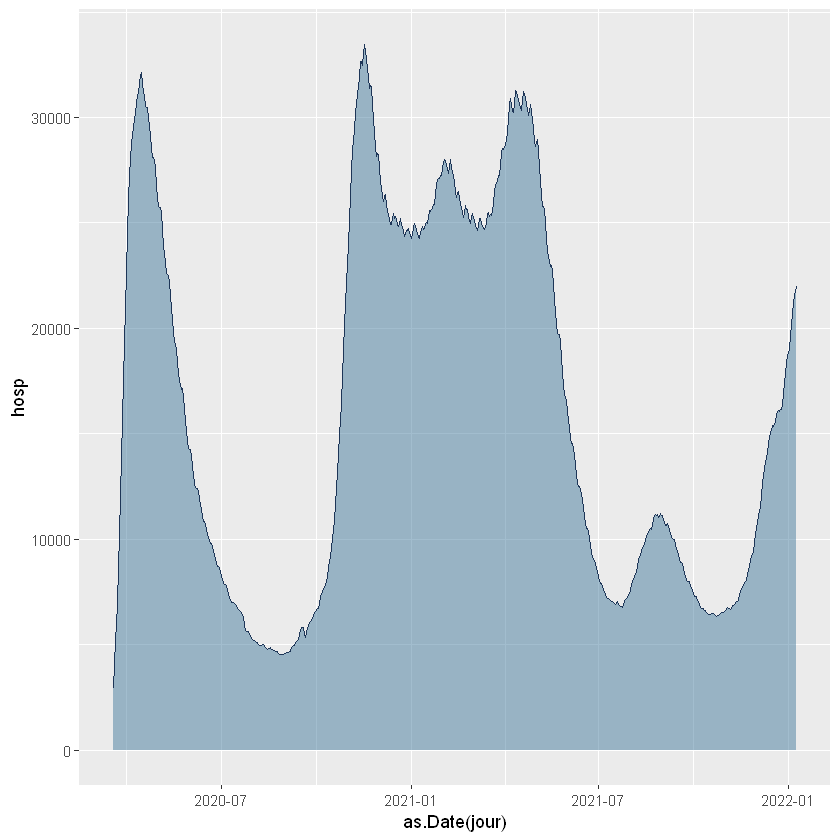

In [41]:
# Area plot
ggplot(df_data_fr, aes(x=as.Date(jour))) + 
  geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.5)

In [54]:
df_data_fr_2020<-df_data_fr %>% filter((as.Date(jour) < as.Date("2021-01-01")) & (as.Date(jour) > as.Date("2019-12-31")))
df_data_fr_2021<-df_data_fr %>% filter((as.Date(jour) < as.Date("2022-01-01")) & (as.Date(jour) > as.Date("2020-12-31"))) 
df_data_fr_2022<-df_data_fr %>% filter((as.Date(jour) < as.Date("2023-01-01")) & (as.Date(jour) > as.Date("2021-12-31"))) 

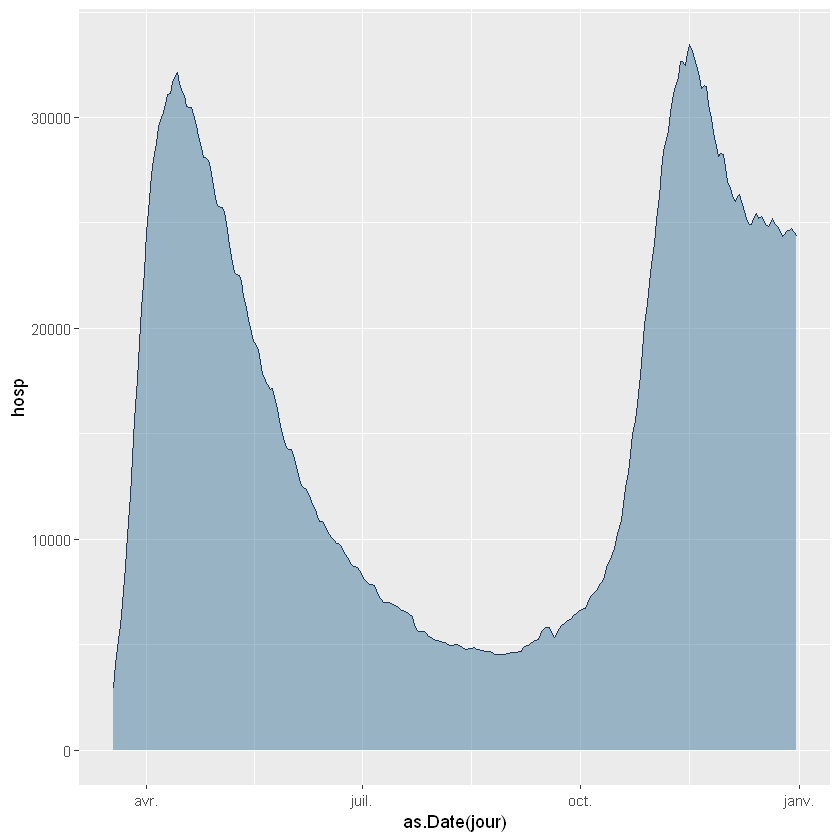

In [134]:
#Année 2020
ggplot(df_data_fr_2020, aes(x=as.Date(jour))) + 
  geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.5)

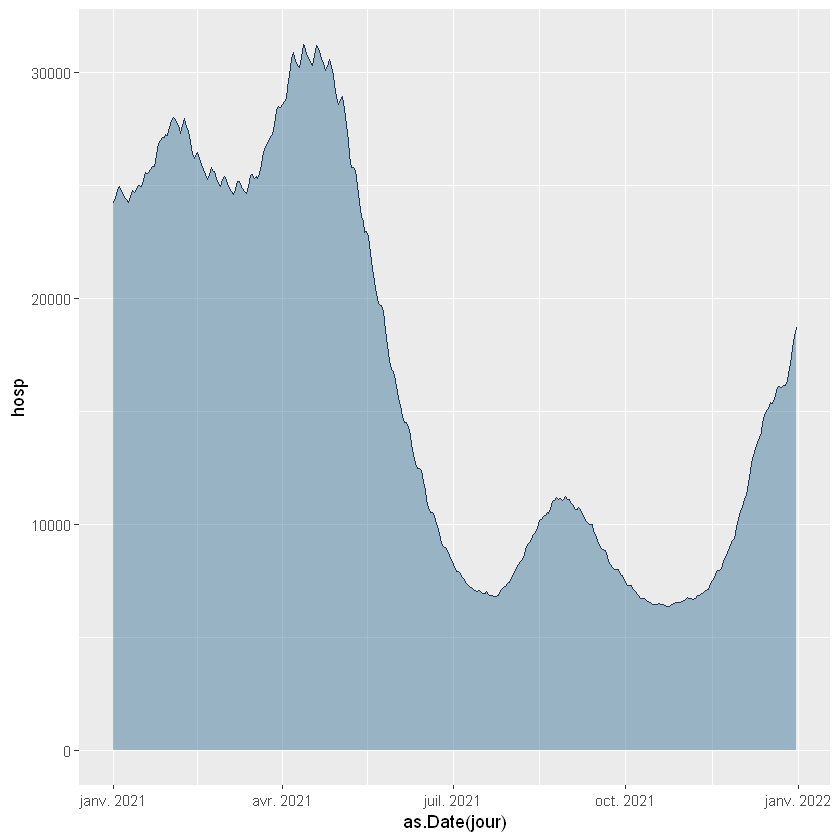

In [57]:
#Année 2021
ggplot(df_data_fr_2021, aes(x=as.Date(jour))) + 
  geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.5)

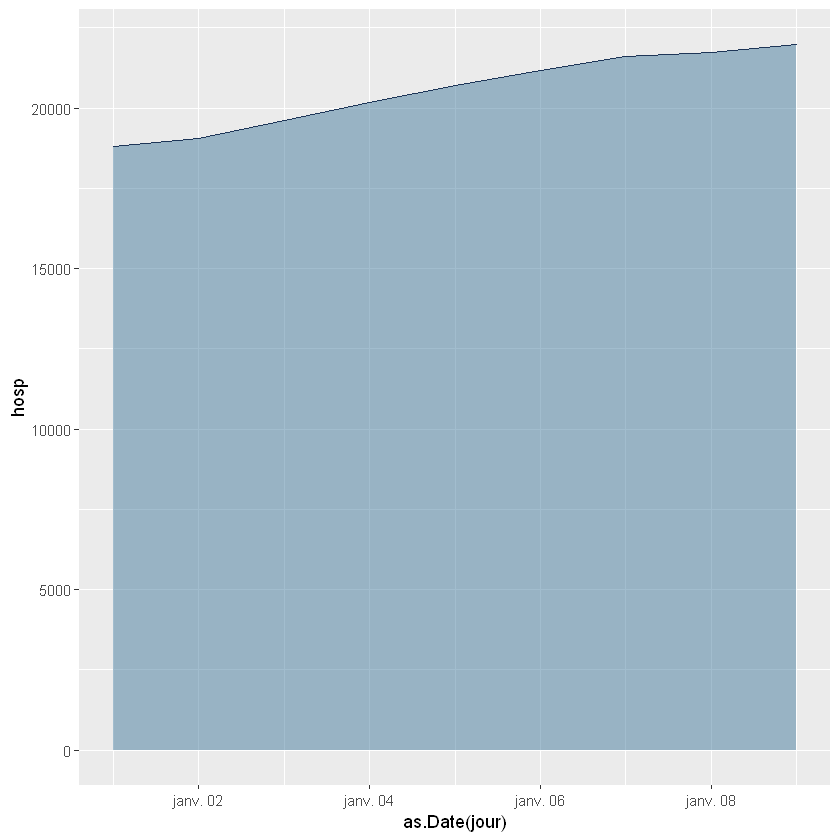

In [58]:
# Année 2022
ggplot(df_data_fr_2022, aes(x=as.Date(jour))) + 
  geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.5)

In [59]:
#completer les dataframes annuelles pour avoir une sorte de chevauchement des affichages (même nombre de raw)

### Repartition hospitaled people

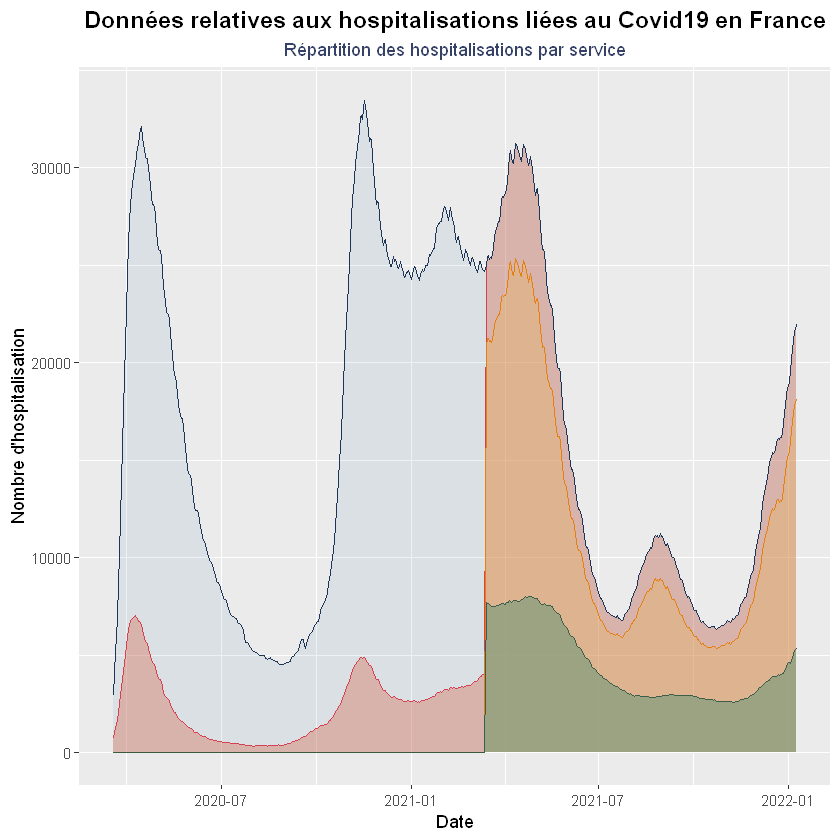

In [73]:
# Area plot
ggplot(df_data_fr, aes(x=as.Date(jour))) + 
ggtitle(label = "Données relatives aux hospitalisations liées au Covid19 en France",
              subtitle = "Répartition des hospitalisations par service")+
theme(
  plot.title = element_text(size = 14, face = "bold",hjust = 0.5),
  plot.subtitle = element_text(color = "#364167",hjust = 0.5)
)+
xlab("Date") + ylab("Nombre d'hospitalisation") +
geom_area(aes(y = rea+HospConv+SSR_USLD+autres), fill = "#e76f51", 
            color = "#e63946", alpha=0.4)+  
geom_area(aes(y = HospConv+SSR_USLD+autres), fill = "#fcbf49", 
            color = "#f77f00", alpha=0.3)+
geom_area(aes(y = SSR_USLD+autres), fill = "#faedcd", 
            color = "#d4a373", alpha=0.4)+
geom_area(aes(y = SSR_USLD+autres), fill = "#588157", 
            color = "#3a5a40", alpha=0.5)+
geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.1)
# +scale_fill_discrete(name = "Type hospitalisation", labels = c("Total", "Reanimation", "Hospitalisation conv","SSR ou USLD", "Autres"))

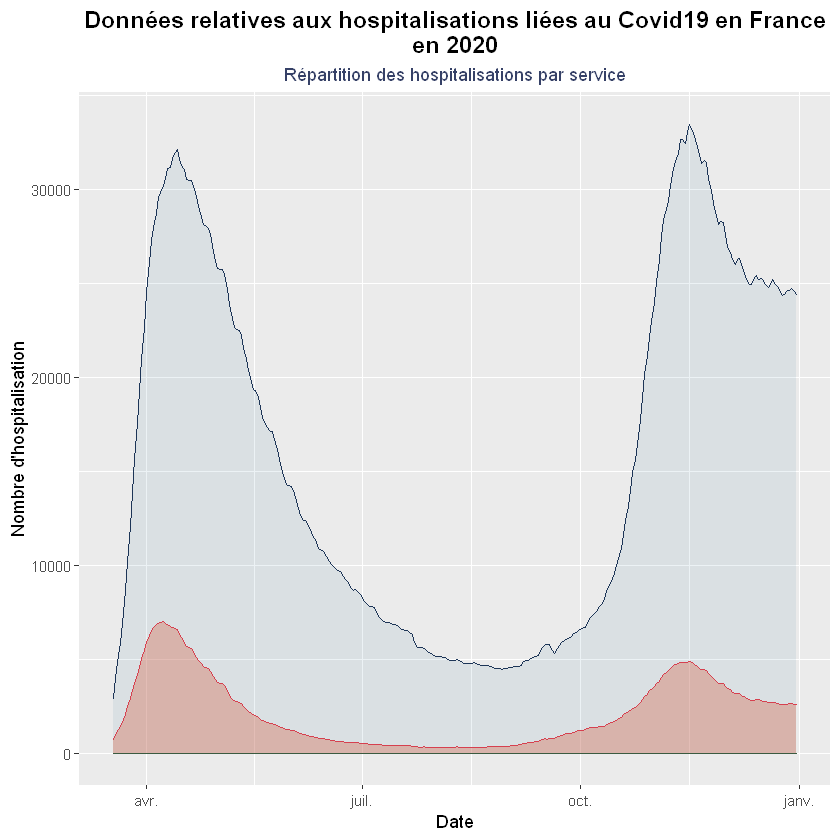

In [76]:
# Area plot
ggplot(df_data_fr_2020, aes(x=as.Date(jour))) + 
ggtitle(label = "Données relatives aux hospitalisations liées au Covid19 en France\nen 2020",
              subtitle = "Répartition des hospitalisations par service")+
theme(
  plot.title = element_text(size = 14, face = "bold",hjust = 0.5),
  plot.subtitle = element_text(color = "#364167",hjust = 0.5)
)+
xlab("Date") + ylab("Nombre d'hospitalisation") +
geom_area(aes(y = rea+HospConv+SSR_USLD+autres), fill = "#e76f51", 
            color = "#e63946", alpha=0.4)+  
geom_area(aes(y = HospConv+SSR_USLD+autres), fill = "#fcbf49", 
            color = "#f77f00", alpha=0.3)+
geom_area(aes(y = SSR_USLD+autres), fill = "#faedcd", 
            color = "#d4a373", alpha=0.4)+
geom_area(aes(y = SSR_USLD+autres), fill = "#588157", 
            color = "#3a5a40", alpha=0.5)+
geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.1)

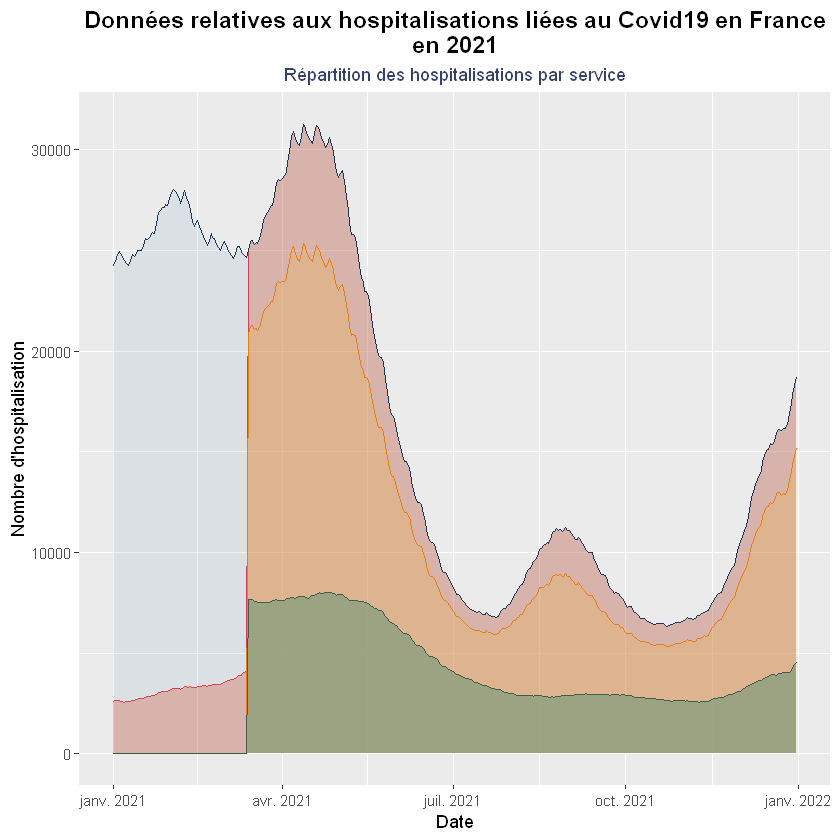

In [78]:
# Area plot
ggplot(df_data_fr_2021, aes(x=as.Date(jour))) + 
ggtitle(label = "Données relatives aux hospitalisations liées au Covid19 en France\nen 2021",
              subtitle = "Répartition des hospitalisations par service")+
theme(
  plot.title = element_text(size = 14, face = "bold",hjust = 0.5),
  plot.subtitle = element_text(color = "#364167",hjust = 0.5)
)+
xlab("Date") + ylab("Nombre d'hospitalisation") +
geom_area(aes(y = rea+HospConv+SSR_USLD+autres), fill = "#e76f51", 
            color = "#e63946", alpha=0.4)+  
geom_area(aes(y = HospConv+SSR_USLD+autres), fill = "#fcbf49", 
            color = "#f77f00", alpha=0.3)+
geom_area(aes(y = SSR_USLD+autres), fill = "#faedcd", 
            color = "#d4a373", alpha=0.4)+
geom_area(aes(y = SSR_USLD+autres), fill = "#588157", 
            color = "#3a5a40", alpha=0.5)+
geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.1)

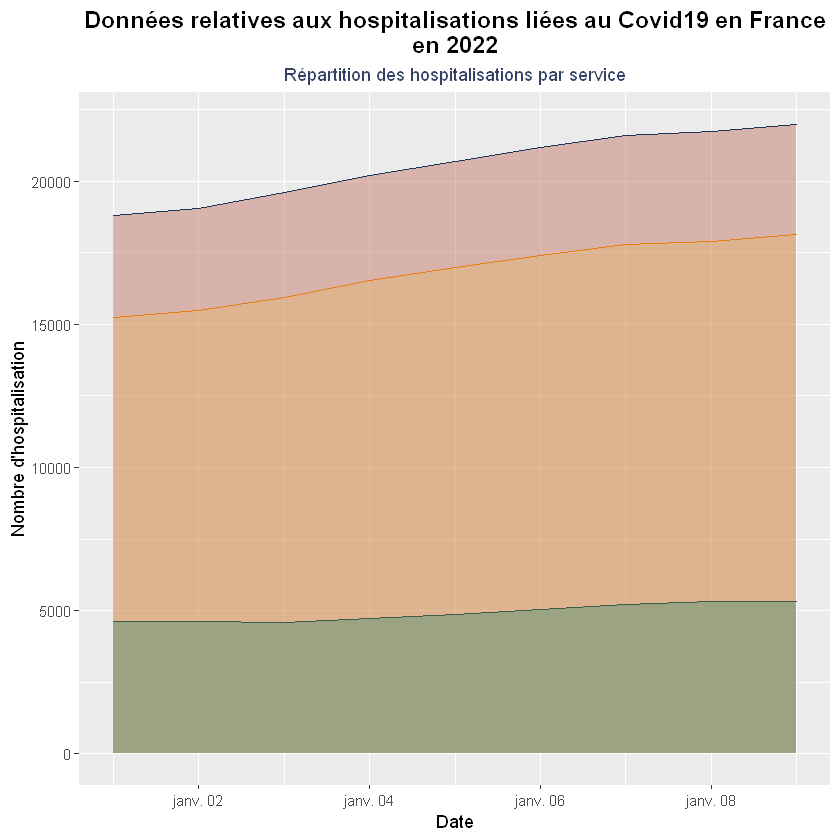

In [129]:
# Area plot
ggplot(df_data_fr_2022, aes(x=as.Date(jour))) + 
ggtitle(label = "Données relatives aux hospitalisations liées au Covid19 en France\nen 2022",
              subtitle = "Répartition des hospitalisations par service")+
theme(
  plot.title = element_text(size = 14, face = "bold",hjust = 0.5),
  plot.subtitle = element_text(color = "#364167",hjust = 0.5)
)+
xlab("Date") + ylab("Nombre d'hospitalisation") +
geom_area(aes(y = rea+HospConv+SSR_USLD+autres), fill = "#e76f51", 
            color = "#e63946", alpha=0.4)+  
geom_area(aes(y = HospConv+SSR_USLD+autres), fill = "#fcbf49", 
            color = "#f77f00", alpha=0.3)+
geom_area(aes(y = SSR_USLD+autres), fill = "#faedcd", 
            color = "#d4a373", alpha=0.4)+
geom_area(aes(y = SSR_USLD+autres), fill = "#588157", 
            color = "#3a5a40", alpha=0.5)+
geom_area(aes(y = hosp), fill = "#457b9d", 
            color = "#1d3557", alpha=0.1)

## Function building area

In [89]:
# sprintf("Print values: %s - %s", more_nb_hosp$hosp,more_nb_hosp$n)


[1] "2019-12-31"


#### Affiche_hosp_periode()

In [220]:
Affiche_hosp_periode <- function(dataframe, deb_date = as.Date("2019-12-31"), end_date = as.Date("2022-01-08")) {
    sprintf("Period of analysis: %s -> %s",as.character.Date(deb_date),as.character.Date(end_date))
    #Filter part#
    df_filtered<-dataframe %>% filter((as.Date(jour) < end_date) & (as.Date(jour) > deb_date))
    
    #Graphic part#
        # Area plot
    title_label = paste("Nombre d'hospitalisation dû au Covid19 dans les territoires français\n de",as.character.Date(deb_date)," à ",as.character.Date(end_date))
    
    ggplot(df_filtered, 
           aes(x=as.Date(jour))) + 
    ggtitle(label = title_label,
            subtitle = "Répartition des hospitalisations par service")+
    theme(
      plot.title = element_text(size = 14, 
                                face = "bold",
                                hjust = 0.5),
      plot.subtitle = element_text(color = "#364167",
                                   hjust = 0.5)
    )+
    xlab("Date") + ylab("Nombre d'hospitalisation") +
    geom_area(aes(y = rea+HospConv+SSR_USLD+autres),
              fill = "#e76f51",
              color = "#e63946",
              alpha=0.4)+  
    geom_area(aes(y = HospConv+SSR_USLD+autres), 
              fill = "#fcbf49", 
              color = "#f77f00", 
              alpha=0.3)+
    geom_area(aes(y = SSR_USLD+autres),
              fill = "#faedcd", 
              color = "#d4a373", 
              alpha=0.4)+
    geom_area(aes(y = SSR_USLD+autres),
              fill = "#588157", 
              color = "#3a5a40", 
              alpha=0.5)+
    geom_area(aes(y = hosp),
              fill = "#457b9d", 
              color = "#1d3557", 
              alpha=0.1)
    
}

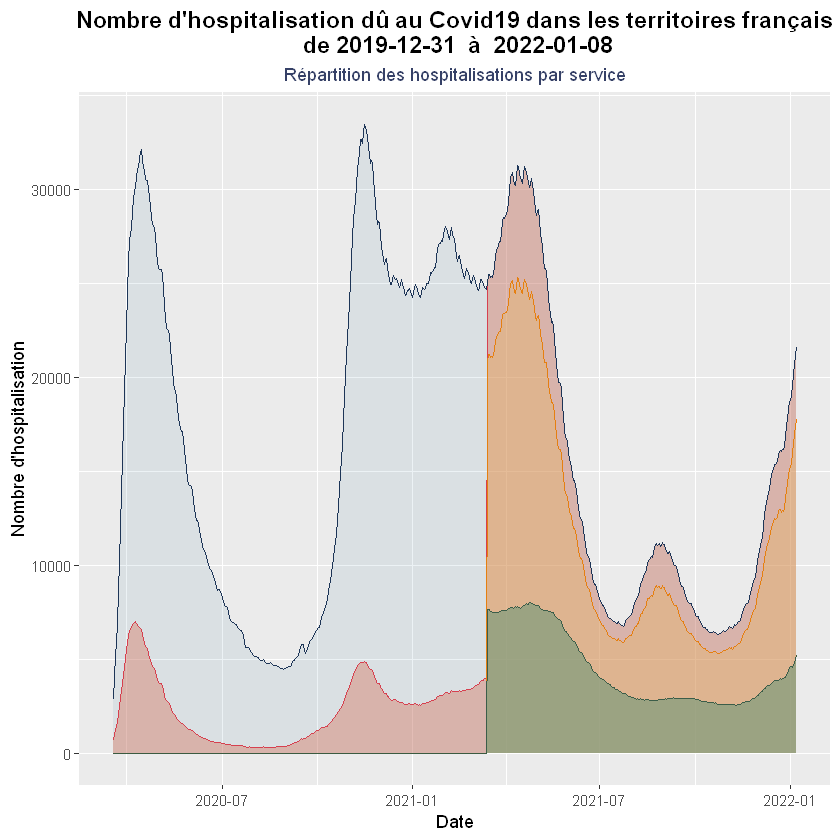

In [221]:
Affiche_hosp_periode(df_data_fr)

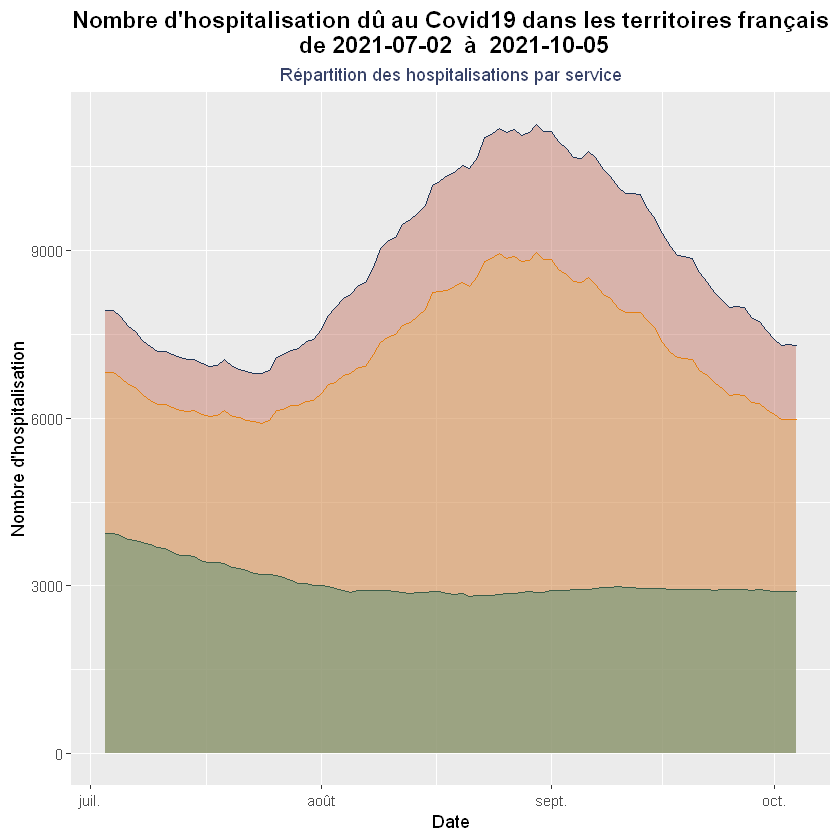

In [158]:
date1 = as.Date("2021-07-02")
date2 = as.Date("2021-10-05")
Affiche_hosp_periode(df_data_fr,date1,date2)

#### Filtre_departement()

In [219]:
Filtre_departement <- function(dataframe, liste_dep = "all") {
    
    nb_dep = length(liste_region)
    
    #Print part of argument#
    if (liste_dep == "all"){
        print("On prend toutes les départements de france")
        df_filtered <- dataframe
    }else{
        if (nb_dep > 1){
            print("Sélection des départements:")
            for(dep in liste_dep){
               print(as.character(dep))
            }
        }else{
            print(paste("Sélection des départements: ",as.character(liste_dep)))
        }
        df_filtered <- dataframe %>% filter(as.character(dataframe$dep) %in% liste_dep)
    }
    
    #On regroupe les données par leur date#
    df_filtered <- df_filtered %>% filter(df_filtered$sexe == 0) %>% group_by(jour) %>% summarise(
                              hosp = sum(hosp),
                              rea = sum(rea),
                              HospConv = sum(HospConv),
                              SSR_USLD = sum(SSR_USLD),
                              autres = sum(autres),
                              dc = sum(dc)
                              )
    df_filtered[is.na(df_filtered)] <- 0
    df_filtered
    
    #Return dataframe filtered#
    return(df_filtered)
}

#### Affiche_dc_periode()

In [217]:
Affiche_dc_periode <- function(dataframe, deb_date = as.Date("2019-12-31"), end_date = as.Date("2022-01-08")) {
    sprintf("Period of analysis: %s -> %s",as.character.Date(deb_date),as.character.Date(end_date))
    #Filter part#
    df_filtered <- dataframe %>% filter((as.Date(jour) < end_date) & (as.Date(jour) > deb_date))
    
    #Graphic part#
        # Area plot
    title_label = paste("Nombre de décès dû au Covid19 dans les territoires français\n de",
                        as.character.Date(deb_date),
                        " à ",
                        as.character.Date(end_date))
    
    ggplot(df_filtered,
           aes(x=as.Date(jour))) + 
#     
    ggtitle(label = title_label)+
    theme(
        plot.title = element_text(size = 14,
                                  face = "bold",
                                  hjust = 0.5),
        panel.grid.major.y = element_line(color = "#BBC5C0",
                                          size = 0.5))+
    xlab("Date") + ylab("Nombre de décès") +
#     
    geom_area(aes(y = dc), fill = "#BBC5C0", 
                color = "#383837", alpha=0.2)
}

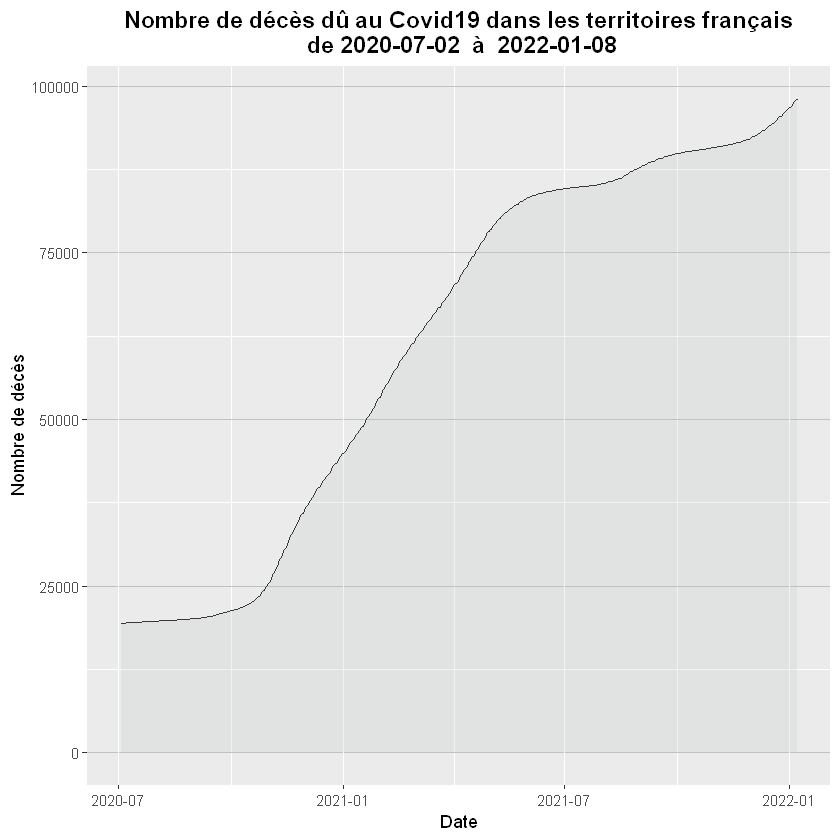

In [218]:
date1 = as.Date("2020-07-02")
date2 = as.Date("2022-01-08")
Affiche_dc_periode(df_data_fr,date1,date2)